# Introducción al Machine Learning - Semana 5
## Caso: Aplicación de árboles de decisión y ensamblajes

### Propósito de la actividad

En esta actividad podrán poner en práctica, con un conjunto de datos reales, su habilidad para implementar modelos basados en árboles y ensamblajes para seleccionar aquel que tenga el mejor desempeño para resolver un problema de clasificación. En particular, se deberán implementar modelos de árboles sencillos, random forest y gradient boosting.

Además, como en todo procedimiento de analítica de datos, se evaluará la exploración preliminar de los datos por medio de herramientas como histogramas, correlogramas y estadísticas descriptivas.

### Instrucciones generales

1. Para desarrollar el notebook, lo deberán descargar a un repositorio (pueden escoger el repositorio de su preferencia) para que lo puedan trabajar grupalmente.

2. Los procedimientos en el notebook deberán responderse en los espacios especificados para tal fin, debajo de cada uno de los puntos.

3. Para que la actividad sea calificada, deberán subir únicamente este mismo archivo con la extensión ".ipynb" a la actividad de "entrega calificada por el personal" correspondiente a este caso.

4. El archivo que suban debe poder ejecutarse localmente cuando sea descargado por el tutor, asumiendo que la base de datos de la actividad ya ha sido importada en el correspondiente archivo separado por comas (.csv).

### Criterios de evaluación

Los criterios que se evaluarán son:

Análisis preliminar de variables: Se presentan correlogramas, histogramas y estadísticas descriptivas de las variables de la base de datos y se hace un análisis coherente de cada uno de ellos. [10 puntos]

Estimación modelo de árbol de decisión: Se estima el modelo usando un árbol de decisión, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos]

Estimación modelo de bagging: Se estima el modelo usando bagging, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos]

Estimación modelo de random forest: Se estima el modelo usando random forest, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos]

Estimación modelo de gradient boosting: Se estima el modelo usando gradient boosting, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos]

Elección del mejor modelo: Se elige el mejor modelo de acuerdo a los resultados obtenidos y se justifica adecuadamente la elección. [10 puntos]


### Datos

En esta ocasión usarán una base de datos disponible en la página R-Data. Esta base de datos corresponde a "Weekly", la cual contiene 8 variables predictivas sobre el índice bursátil S&P500 y 1089 observaciones. De esta manera, el objetivo de la actividad es predecir si el precio del índice subirá o bajará la semana siguiente.

Por lo anterior, en primer lugar deberán descargar la base de datos del siguiente enlace: https://r-data.pmagunia.com/dataset/r-dataset-package-islr-weekly

###  Análisis preliminar de variables (10 puntos)
Realicen un análisis preliminar de los predictores y de la variable de respuesta (correlogramas, histogramas y estadísticas descriptivas).

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
df_weekly = pd.read_csv('Weekly.csv')
df_weekly = df_weekly.drop(columns=['Today','Year','Unnamed: 0'])
df_weekly.head()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Direction
0,0.816,1.572,-3.936,-0.229,-3.484,0.154976,Down
1,-0.270,0.816,1.572,-3.936,-0.229,0.148574,Down
2,-2.576,-0.270,0.816,1.572,-3.936,0.159837,Up
3,3.514,-2.576,-0.270,0.816,1.572,0.161630,Up
4,0.712,3.514,-2.576,-0.270,0.816,0.153728,Up


In [ ]:
df_weekly["Direction"] = df_weekly["Direction"].map({"Up": 1, "Down": 0})
print(df_weekly.head())
print(df_weekly.columns)

XTotal = df_weekly.drop(columns=["Direction"])  ### Definicion de variables predictoras
XTotal = XTotal.apply(pd.to_numeric, errors='coerce')
yTotal = df_weekly["Direction"]   ### Definicion de Variable objetivo
XTrain, XTest, yTrain, yTest = train_test_split(XTotal, yTotal, test_size=0.33, random_state=0) ### Definición de datos de entrenamiento y de prueba

# datos para analisis preliminar
df_xtrain = pd.DataFrame(XTrain) ### Dataframe con datos de entrenamiento para análisis preliminar
df_ytrain = pd.DataFrame(yTrain) ### Dataframe con datos de variable de respuesta

    Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Direction
0  0.816  1.572 -3.936 -0.229 -3.484  0.154976          0
1 -0.270  0.816  1.572 -3.936 -0.229  0.148574          0
2 -2.576 -0.270  0.816  1.572 -3.936  0.159837          1
3  3.514 -2.576 -0.270  0.816  1.572  0.161630          1
4  0.712  3.514 -2.576 -0.270  0.816  0.153728          1
Index(['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Direction'], dtype='object')


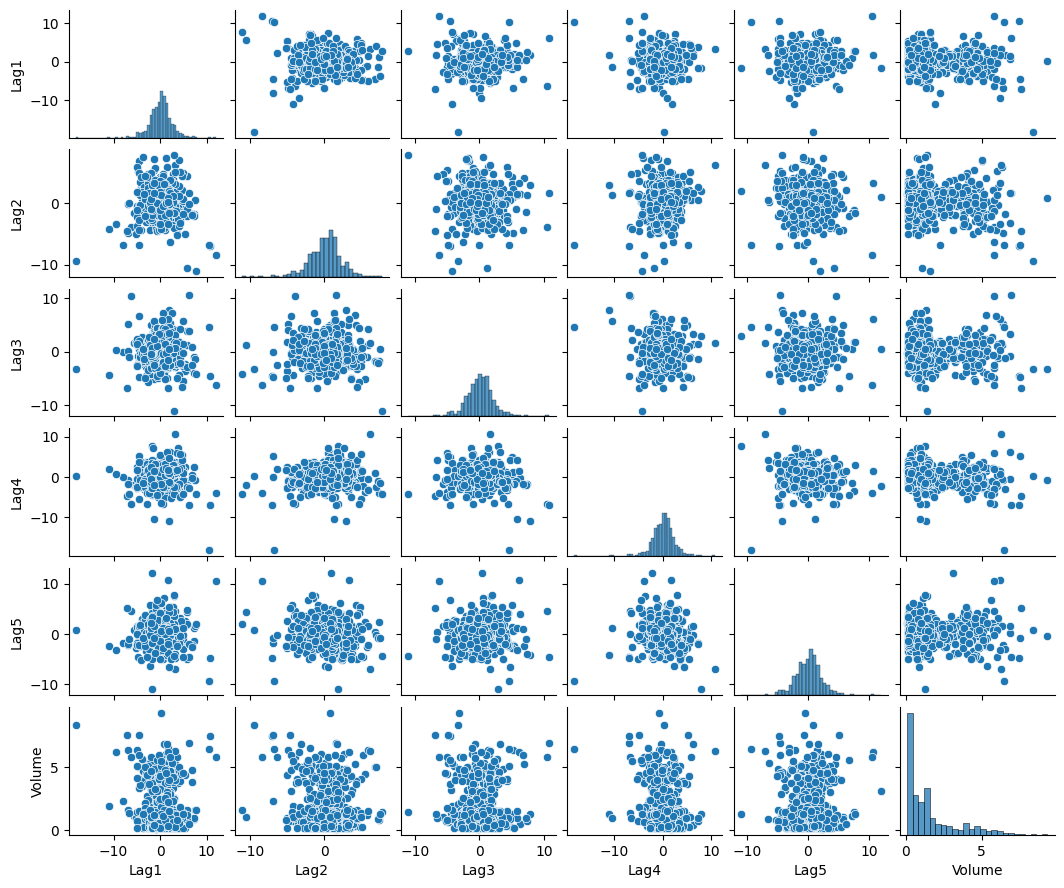

In [ ]:
### Correlogramas de variables predictoras
sns.pairplot(df_xtrain, kind="scatter", height=1.5, aspect= 1.2)  # Ajusta el tamaño
plt.show()

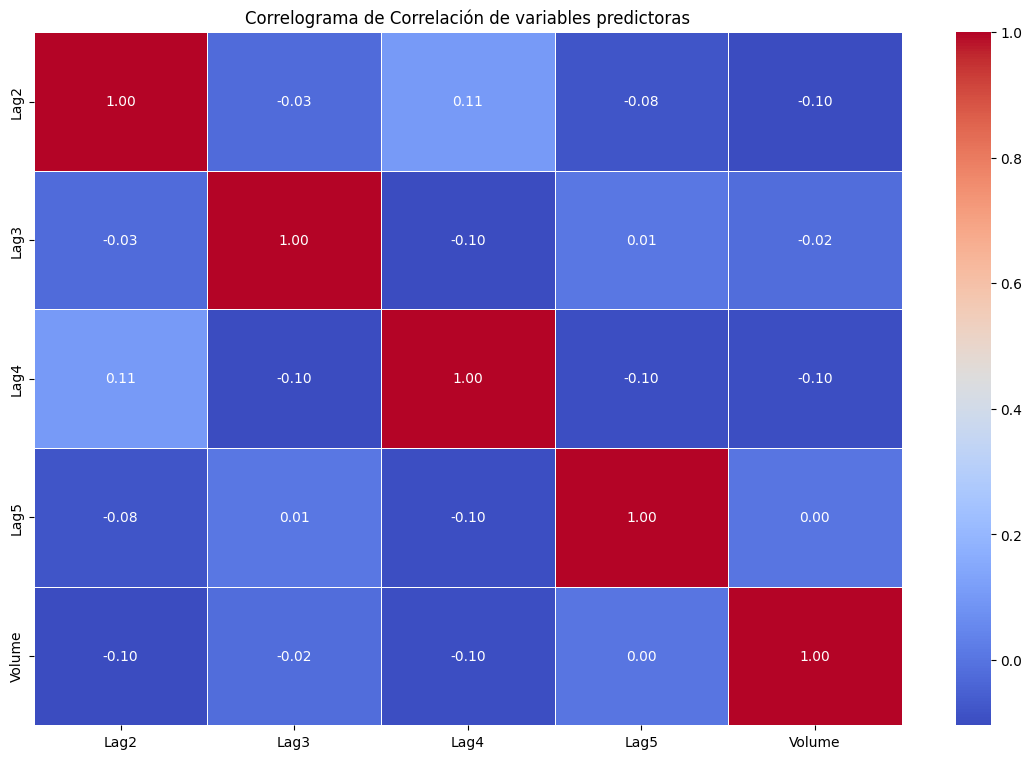

In [ ]:
# Mapa de calor de correlaciones entre variables predictoras
df_xtrain = pd.DataFrame(XTrain)
correlation_matrix = df_xtrain.iloc[:, 1:].corr()

plt.figure(figsize=(14,9))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlograma de Correlación de variables predictoras")
plt.show()

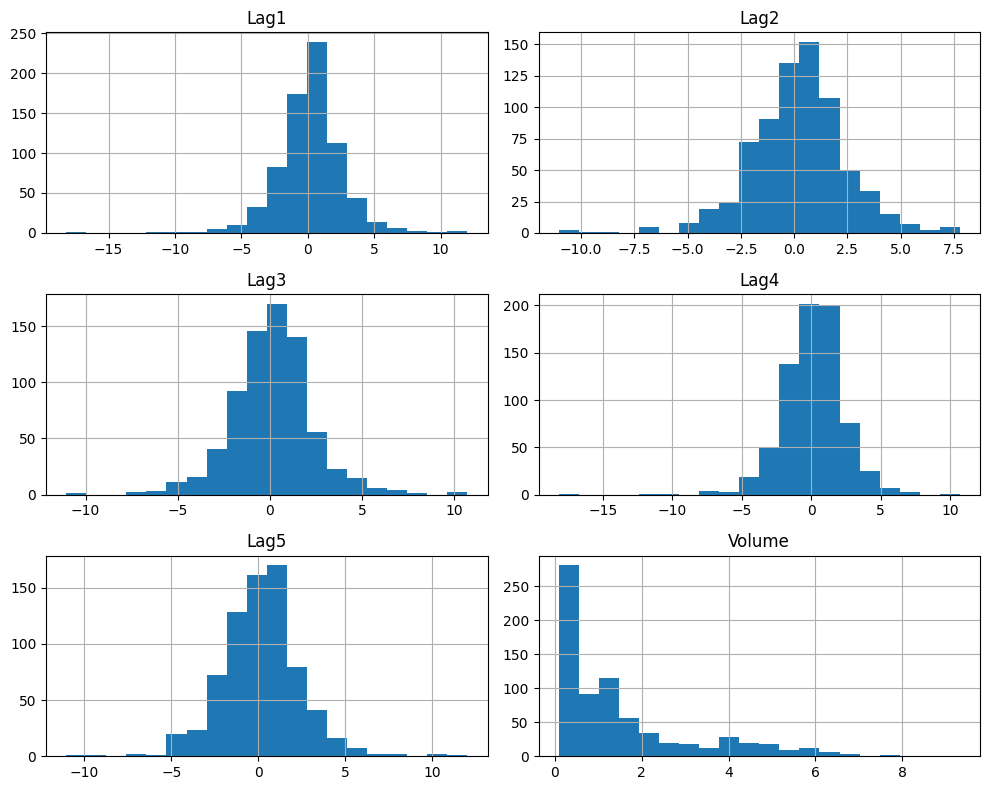

In [ ]:
### Histograma de variables predictoras
df_xtrain.hist(bins=20, figsize=(10, 8))
plt.tight_layout()  # asegurarse de que las subgráficas no se solapen
plt.show()

In [ ]:
### Estadisticas descriptivas de variables predictoras
print(df_xtrain.describe())

             Lag1        Lag2        Lag3        Lag4        Lag5      Volume
count  729.000000  729.000000  729.000000  729.000000  729.000000  729.000000
mean     0.181447    0.191561    0.136015    0.109395    0.143092    1.550021
std      2.469927    2.265412    2.200361    2.270953    2.277368    1.670156
min    -18.195000  -11.050000  -11.050000  -18.195000  -11.050000    0.087465
25%     -1.147000   -1.124000   -1.154000   -1.147000   -1.205000    0.313150
50%      0.241000    0.299000    0.149000    0.230000    0.230000    0.966200
75%      1.441000    1.436000    1.327000    1.337000    1.360000    1.990310
max     12.026000    7.780000   10.707000   10.707000   12.026000    9.328214


In [ ]:
print(df_ytrain.describe())

        Direction
count  729.000000
mean     0.563786
std      0.496255
min      0.000000
25%      0.000000
50%      1.000000
75%      1.000000
max      1.000000


**Procedimiento**

En primer lugar, se cargó el conjunto de datos Weekly.csv utilizando pandas. Después de cargar los datos, se eliminaron las siguientes columnas: [´Unnamed: 0' ó # Registro], ['Year'] pues es una variable que no aporta mucho a la predicción y ['Today'] pues es la misma variable Direction pero numerica por lo tanto no se debe predecir con una variable que ya es el resultado, además se transformó la variable Direction en una variable binaria, asignando un valor de 1 a "Up" y 0 a "Down". Esto facilita la predicción de la dirección del índice financiero S&P500.

Se separaron las variables predictoras, todos los datos excepto la columna Direction,  y se almacenaron en la variable XTotal, mientras que la variable objetivo (Direction) se almacenó en yTotal. Luego, los datos se dividieron en un conjunto de entrenamiento y un conjunto de prueba utilizando train_test_split, con el 33% de los datos destinados para la prueba y el resto para el entrenamiento.



**Análisis y conclusiones**

Las estadísticas descriptivas muestran que las variables Lag tienen una gran dispersión en los valores, con valores que van desde negativos hasta muy positivos, lo que puede ser un indicio de volatilidad.

La variable Direction tiene una distribución equilibrada con valores 0 y 1 en casi igual proporción, lo que es importante para evitar que los modelos se vean sesgados.

Los histogramas al igual que las estadísticas descriptivas mostraron que las variables predictoras tienen distribuciones variadas, algunas más centradas y otras más dispersas.

El análisis de correlación reveló que algunas variables tienen relaciones fuertes entre sí. Este análisis es útil para identificar qué variables podrían ser redundantes.

Ademas de esto, como la variable Direction está equilibrada, no es necesario realizar un ajuste en el balance de clases, lo que es positivo, ya que los modelos no estarán sesgados hacia una clase en particular.

### 2. Estimación modelo de árbol de decisión (20 puntos)
Estimen un árbol de decisión con la muestra de entrenamiento y calculen su poder predictivo evaluándolo en la muestra de test.

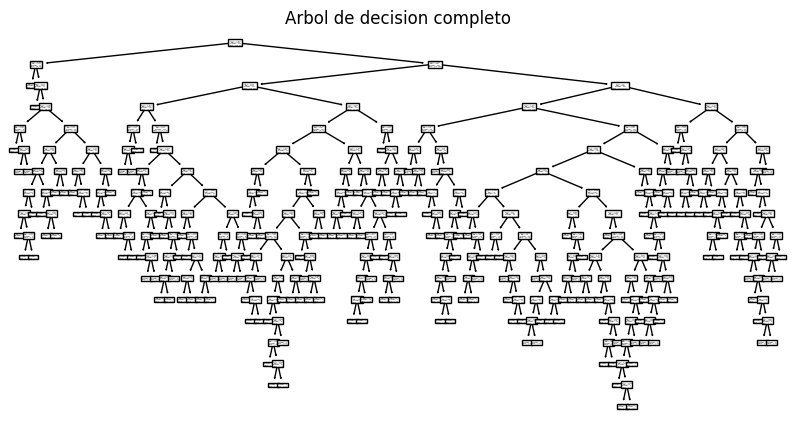

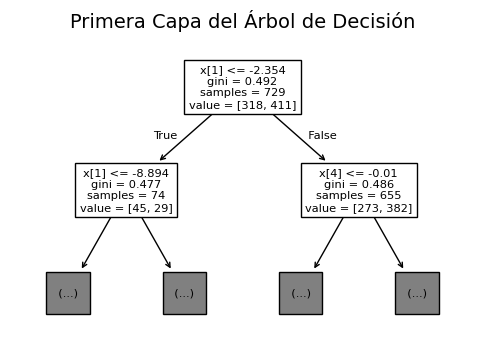

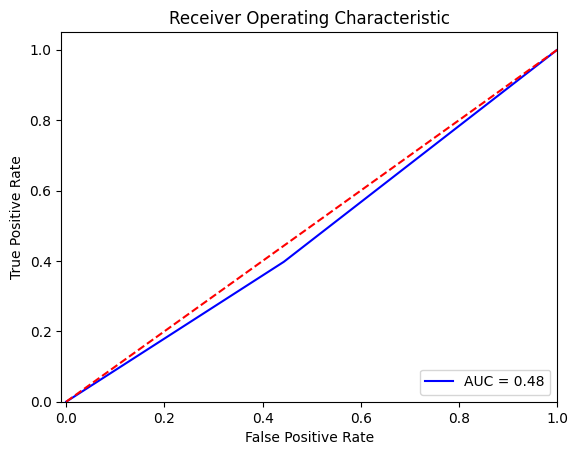


El valor del AUC es: 0.4771456961868091


In [ ]:
# Entrenamiento de arbol de decision
clfTree = DecisionTreeClassifier()
clfTree.fit(XTrain, yTrain)

#Graficar arbol de decision completo
plt.figure(figsize = (10, 5))
plot_tree(clfTree)
plt.title("Arbol de decision completo")
plt.show()
print("")

#Graficar primera capa del arbol
plt.figure(figsize = (6, 4))
plot_tree(clfTree,max_depth=1)
plt.title("Primera Capa del Árbol de Decisión", fontsize=14)
plt.show()
print("")

# Curva ROC Y AUC
prediccionTree=clfTree.predict_proba(XTest)[:,0]
fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionTree, pos_label=0)
AUCTree=metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCTree)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print(f"\nEl valor del AUC es: {AUCTree}")

#### **Procedimiento**
Se realiza el entrenamiento del modelo con los datos de entrenamiento (XTrain y yTrain), generando aproximadamente 20 niveles en la estructura del arbol.
Posteriormente se evalua el modelo con los datos prueba (XTest y yTest), para Calcular la curva ROC y AUC.

#### **Análisis y Conclusiones**
Para los datos del S&P 500, el modelo de árbol de decisión no resulta adecuado para predecir. La alta variabilidad de los datos impide que el modelo tenga la robustez necesaria para capturar patrones de manera efectiva.

Este comportamiento se refleja en el AUC obtenido (0.49), el cual es inferior al valor esperado por azar (0.5). Un AUC menor a 0.5 indica que el modelo tiene un desempeño peor que una clasificación aleatoria.

Por lo tanto, se concluye que el modelo no cuenta con la capacidad predictiva necesaria, y se recomienda explorar otras técnicas de modelado más adecuadas para este tipo de datos.

### 3. Estimación modelo de bagging (20 puntos)
Estimen un modelo de bagging para árboles de decisión y calculen su poder predictivo evaluándolo en la muestra de test.


=== Modelo Bagging ===
Matriz de confusión:
[[ 66 100]
 [ 76 118]]


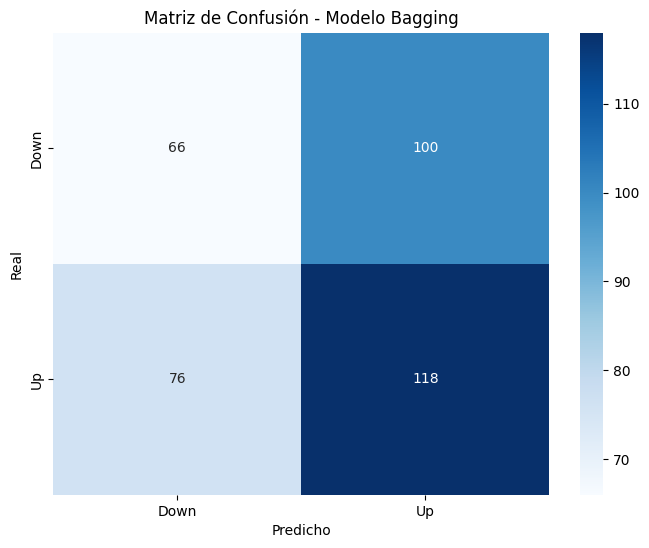


Reporte de clasificación:
              precision    recall  f1-score   support

        Down       0.46      0.40      0.43       166
          Up       0.54      0.61      0.57       194

    accuracy                           0.51       360
   macro avg       0.50      0.50      0.50       360
weighted avg       0.51      0.51      0.51       360



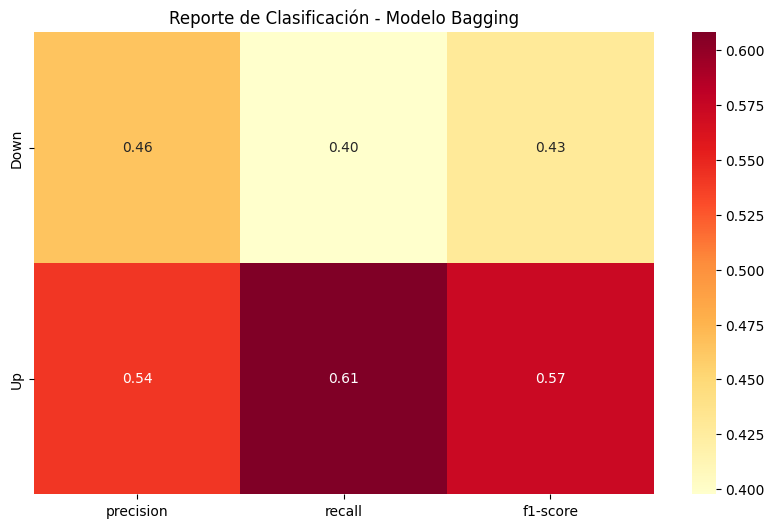

Precisión global: 0.5111


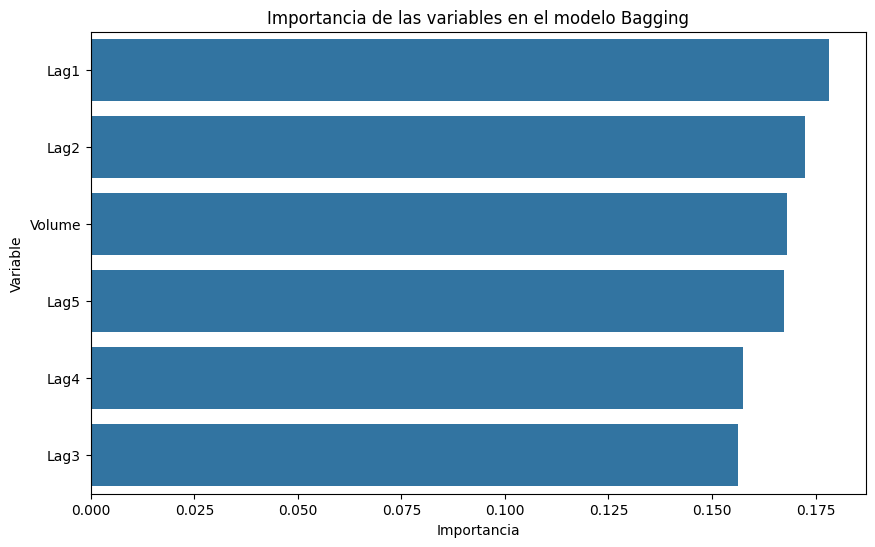

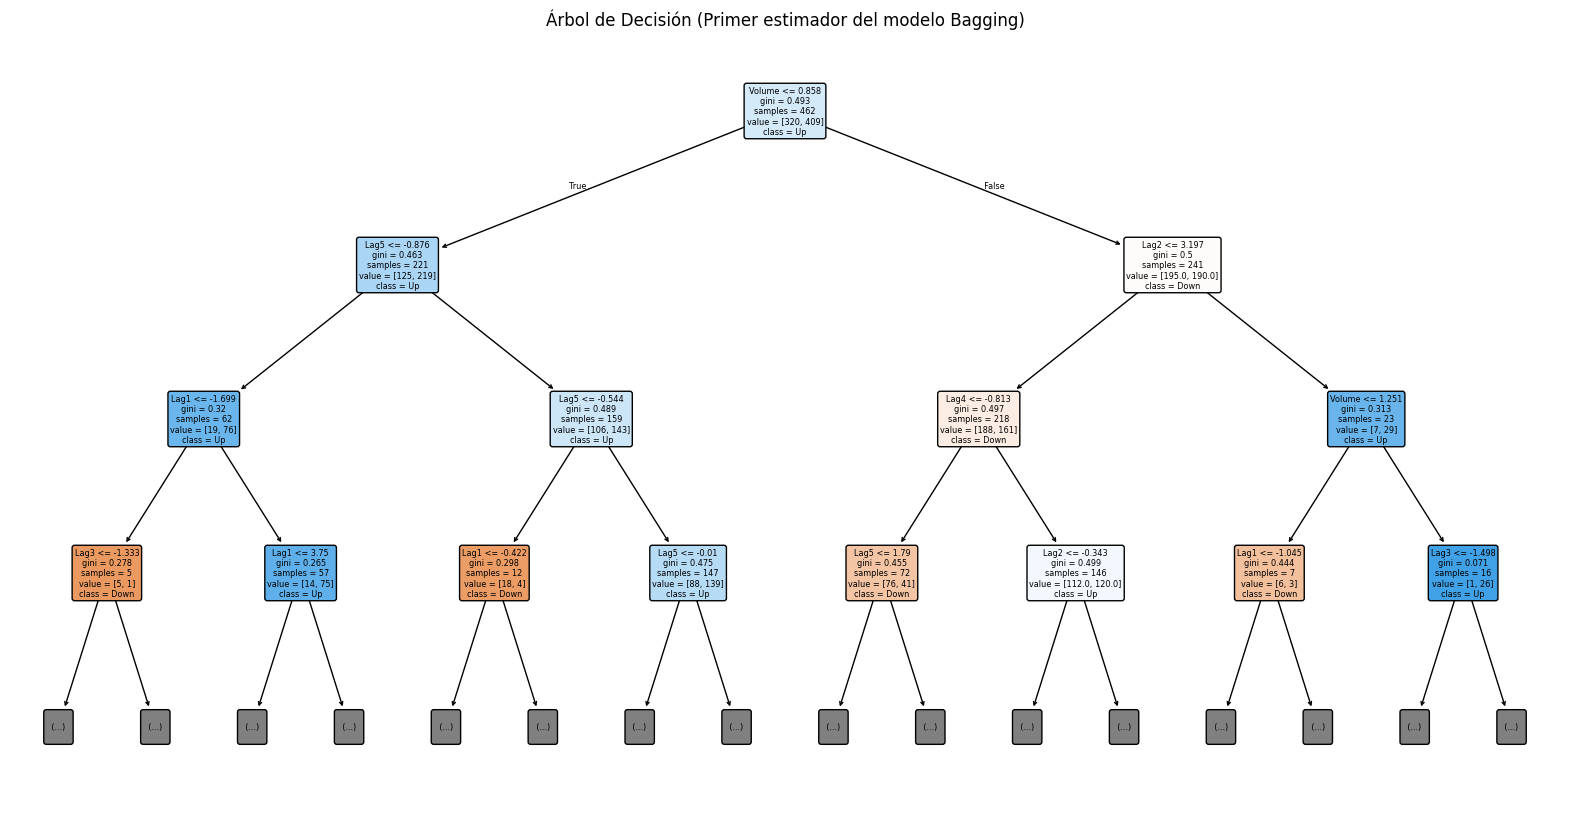


=== Análisis de Resultados ===
El modelo Bagging con 100 árboles obtuvo una precisión de 0.5111 en el conjunto de prueba.
Las variables más importantes según el modelo son:
  Variable  Importancia
0     Lag1     0.178211
1     Lag2     0.172540
5   Volume     0.168051
4     Lag5     0.167449
3     Lag4     0.157429

Interpretación:
- La matriz de confusión muestra el balance entre verdaderos positivos y negativos.
- El reporte de clasificación detalla la capacidad del modelo para predecir cada clase.
- La importancia de variables indica qué factores tienen mayor influencia en la predicción de Direction.
- El árbol de decisión muestra una representación simplificada de las reglas de decisión de uno de los estimadores.


In [ ]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 3 ####
# 2. Modelo Bagging
print("\n=== Modelo Bagging ===")
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(),
                                 n_estimators=100,
                                 random_state=0)
bagging_model.fit(XTrain, yTrain)
bagging_pred = bagging_model.predict(XTest)

# Evaluación del modelo
print("Matriz de confusión:")
cm = confusion_matrix(yTest, bagging_pred)
print(cm)

# Gráfica de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.title('Matriz de Confusión - Modelo Bagging')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

# Reporte de clasificación
print("\nReporte de clasificación:")
report = classification_report(yTest, bagging_pred, target_names=['Down', 'Up'], output_dict=True)
print(classification_report(yTest, bagging_pred, target_names=['Down', 'Up']))

# Gráfica del reporte de clasificación
report_df = pd.DataFrame(report).transpose().iloc[:-3, :-1]  # Excluye 'support' y filas de promedio
plt.figure(figsize=(10, 6))
sns.heatmap(report_df, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Reporte de Clasificación - Modelo Bagging')
plt.show()

bagging_accuracy = metrics.accuracy_score(yTest, bagging_pred)
print(f"Precisión global: {bagging_accuracy:.4f}")

# calculo de AUC
fpr, tpr, thresholds = metrics.roc_curve(yTest, bagging_pred, pos_label=0)
AUCBag=metrics.auc(fpr, tpr)

# Análisis de importancia de variables (promedio de los árboles)
feature_importance = np.mean([tree.feature_importances_
                            for tree in bagging_model.estimators_], axis=0)
feature_names = XTrain.columns
importance_df = pd.DataFrame({'Variable': feature_names,
                            'Importancia': feature_importance})
importance_df = importance_df.sort_values('Importancia', ascending=False)

# Visualización de importancia de variables
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Variable', data=importance_df)
plt.title('Importancia de las variables en el modelo Bagging')
plt.show()

# Visualización de un árbol de decisión (el primero del ensemble)
plt.figure(figsize=(20, 10))
plot_tree(bagging_model.estimators_[0],
          feature_names=XTrain.columns,
          class_names=['Down', 'Up'],
          filled=True,
          rounded=True,
          max_depth=3)  # Limitamos la profundidad para mejor visualización
plt.title('Árbol de Decisión (Primer estimador del modelo Bagging)')
plt.show()

# Análisis de resultados
print("\n=== Análisis de Resultados ===")
print(f"El modelo Bagging con {bagging_model.n_estimators} árboles obtuvo una precisión de {bagging_accuracy:.4f} en el conjunto de prueba.")
print("Las variables más importantes según el modelo son:")
print(importance_df.head())
print("\nInterpretación:")
print("- La matriz de confusión muestra el balance entre verdaderos positivos y negativos.")
print("- El reporte de clasificación detalla la capacidad del modelo para predecir cada clase.")
print("- La importancia de variables indica qué factores tienen mayor influencia en la predicción de Direction.")
print("- El árbol de decisión muestra una representación simplificada de las reglas de decisión de uno de los estimadores.")




Procedimiento del Modelo Bagging con Análisis Exploratorio
1.	Carga y Preparación de Datos:
Se carga el archivo 'Weekly.csv' y se eliminan las columnas 'Today', 'Year' y 'Unnamed: 0'. La variable objetivo 'Direction' se convierte en binaria (0 para "Down", 1 para "Up"). Las variables predictoras (Lag1 a Lag5 y Volume) y la objetivo se dividen en conjuntos de entrenamiento (67%) y prueba (33%) con un random_state=0 para reproducibilidad.
2.	Análisis Exploratorio Preliminar:
o	Se calculan estadísticas descriptivas (media, desviación, etc.) de las variables predictoras.
o	Histogramas: Se generan cinco gráficos que muestran la distribución de cada variable predictora (Lag1 a Lag5 y Volume) con una curva de densidad, permitiendo identificar su forma y posibles sesgos.
o	Correlograma: Un mapa de calor muestra las correlaciones entre las variables predictoras, con valores anotados para evaluar relaciones lineales.
o	Distribución de Direction: Un gráfico de barras indica el balance entre "Down" (0) y "Up" (1) en el conjunto de entrenamiento.
3.	Entrenamiento del Modelo Bagging:
Se implementa un modelo Bagging con 100 árboles de decisión (n_estimators=100) como estimadores base, usando BaggingClassifier. El modelo se entrena con los datos de entrenamiento.
4.	Evaluación y Visualización:
o	Matriz de Confusión: Se calcula y se grafica como un mapa de calor, mostrando los verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos para "Down" y "Up".
o	Reporte de Clasificación: Se genera un informe con métricas (precision, recall, f1-score) por clase, visualizado como un mapa de calor que resalta el desempeño del modelo en cada categoría.
o	Precisión Global: Se mide la exactitud total del modelo en el conjunto de prueba.
5.	Importancia de Variables:
o	Se calcula la importancia promedio de las variables predictoras basada en los árboles del modelo.
o	Gráfica de Importancia: Un gráfico de barras ordena las variables por su contribución a las predicciones, destacando las más influyentes.
6.	Visualización del Árbol de Decisión:
o	Árbol de Decisión: Se grafica el primer árbol del ensemble (limitado a profundidad 3), mostrando las reglas de decisión con nombres de variables y clases ("Down", "Up"), coloreado para indicar la clase mayoritaria en cada nodo.
7.	Análisis de Resultados:
Se resume la precisión del modelo, se destacan las variables más importantes y se interpretan las gráficas: la matriz de confusión muestra el balance de predicciones, el reporte detalla el desempeño por clase, la importancia de variables identifica factores clave, y el árbol ilustra el proceso de decisión de un estimador.

### 4. Estimación modelo de random forest (20 puntos)
Estimen un modelo de Random Forest y evalúen su poder predictivo en la muestra de test.

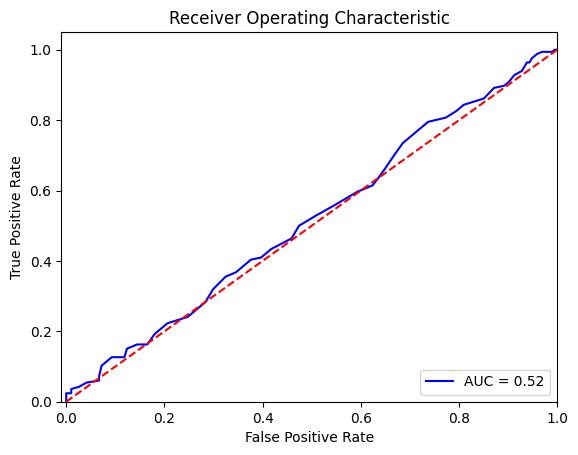

In [ ]:
#Crear y ajustar el modelo
clfRF = RandomForestClassifier(random_state=0)
clfRF.fit(XTrain, yTrain)

#Prediccion premiliminar en el conjunto de prueba
prediccionRF = clfRF.predict_proba(XTest)[:, 0]

#Calcular el ROC
fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionRF, pos_label=0)

#Calcular el AUC
AUCRF = metrics.auc(fpr, tpr)

#Graficar la curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % AUCRF)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')  # Línea de referencia: desempeño aleatorio
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


**MODELO RANDOM FOREST**

**Procedimiento:**
Para evaluar el desempaño del modelo de Random Forest, se entreno el modelo con los datos de entrenamiento. Luego, se realizo la prediccion sobre los dato de prueba y se genero la curva ROC para medir la capacidad del modelo.
La metrica utilizada para evaluar el modelo fue el AUC, que en este caso obtuvo un valor de 0.52, lo que indica que el modelo apenas supera la clasificacion aleatoria.

**Conclusiones**
El resultado obtenido sugiere que el modelo de Random Forest no esta logrando capturar los patrones significativos de los datos. Un AUC de 0.52 indica que el modelo no tiene una buena capacidad predictiva, ya que un valor cercano a 0.5 significa que el modelo es practicamente igual a una clasificacion aleatoria.
Dado el bajo desempeño del modelo, es importante analizar si los datos contienen suficiente informacion relevante para la tarea de clasificacion o si es necesario generar nuevas variables que capturen mejor la relacion la variable objetivo.

### 5. Estimación modelo de gradient boosting (20 puntos)
Estimen un modelo de Gradient Boosting y evalúen su poder predictivo en la muestra de test.

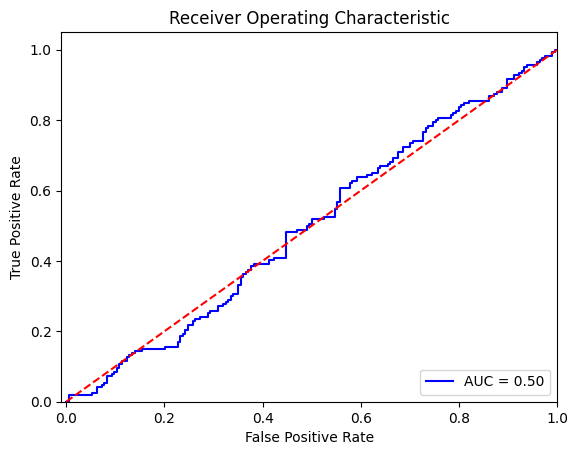

In [ ]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 5 ####

# crear el objeto de Gradient Boosting Classifier
clfGB= GradientBoostingClassifier(learning_rate=1.0,max_depth=1,random_state=0)
# ajustar el objeto
clfGB.fit(XTrain, yTrain)
# crear predicciones
prediccionGB=clfGB.predict_proba(XTest)[:,0]

# sacar métricas de evaluación
fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionGB, pos_label=0)
AUCGB=metrics.auc(fpr, tpr)

# graficar ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCGB)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# intentar mejorar el desempeño probando diferentes combinaciones de:
# cantidad de estimadores
# parametro de learning rate
# y max_depth

from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [1, 3, 5],
}

clfGB_adjusted = GradientBoostingClassifier(random_state=0)
grid_search = GridSearchCV(clfGB_adjusted, param_grid, cv=5, scoring="roc_auc", n_jobs=-1)
grid_search.fit(XTrain, yTrain)

print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 200}


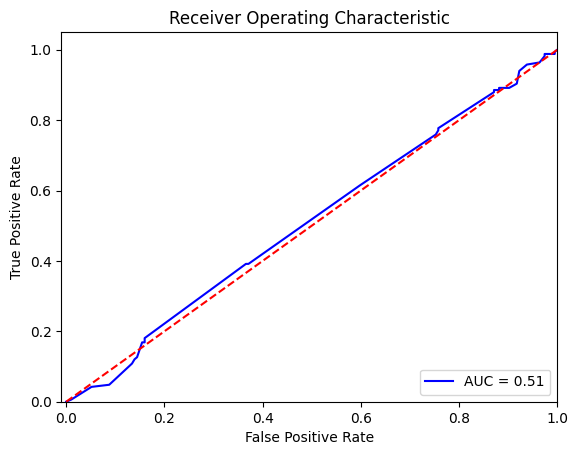

In [ ]:
# se ajusta clfGB_adjusted con esos parametros
clfGB_adjusted = GradientBoostingClassifier(learning_rate=0.01, max_depth = 1, n_estimators = 200)
clfGB_adjusted.fit(XTrain, yTrain)
prediccionGB_adjusted = clfGB_adjusted.predict_proba(XTest)[:, 0]

# sacar métricas de evaluación
fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionGB_adjusted, pos_label=0)
AUCGB_adjusted=metrics.auc(fpr, tpr)

AUCGB = AUCGB_adjusted

# graficar ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCGB_adjusted)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### **Procedimiento**

Para este punto, primero se intentó ajustar un modelo de gradient boosting con unos parámetros arbitrarios: **la cantidad de estimadores** en default (que es 100) y el **learning rate** 1.0 y **max_depth** (que limita el número de nodos en cada árbol) de 1, es decir, se estarían usando árboles simples de 1 solo nodo. Esto da como resultado un modelo con **AUC de 0.50**, el cual no es nada bueno, pues esto nos dice que es prácticamente igual de bueno que clasificar la variable de salida al azar.

En un intento de mejorar los resultados, se establecieron diferentes valores a probar de cada uno de los tres parámetros:

1. n_estimators
2. learning_rate
3. max_depth

Con ayuda de **GridSearchCV** se pueden probar todas las **combinaciones** diferentes de esos 3 **parámetros** y evaluar (por medio de cross validation) cuál combinación da mejores resultados en términos de AUC.

Posteriormente se utilizaron los parámetros determinados por GridSearch para una versión ajustada del modelo, la cual, solamente aumentó 0.01 el AUC.

#### **Análisis y Conclusiones**

A pesar de los ajustes realizados, el modelo no logra capturar patrones significativos en los datos y su desempeño sigue siendo **deficiente**. Esto sugiere que el modelo podría estar limitado por la naturaleza de los datos, ya sea porque las variables predictoras no contienen suficiente información para distinguir correctamente entre las clases o porque la relación entre ellas y la variable objetivo no es capturada eficazmente por Gradient Boosting. Otra posible explicación es que el problema en cuestión no se ajusta bien a este tipo de modelo y podría beneficiarse de un enfoque diferente, como modelos lineales, técnicas de selección de variables o incluso métodos de ensamblado más complejos.

### 6. Selección del mejor modelo (10 puntos)
¿Cuál modelo de los estimados en este caso resulta mejor para la predicción de la variable de respuesta? Justifiquen su respuesta.

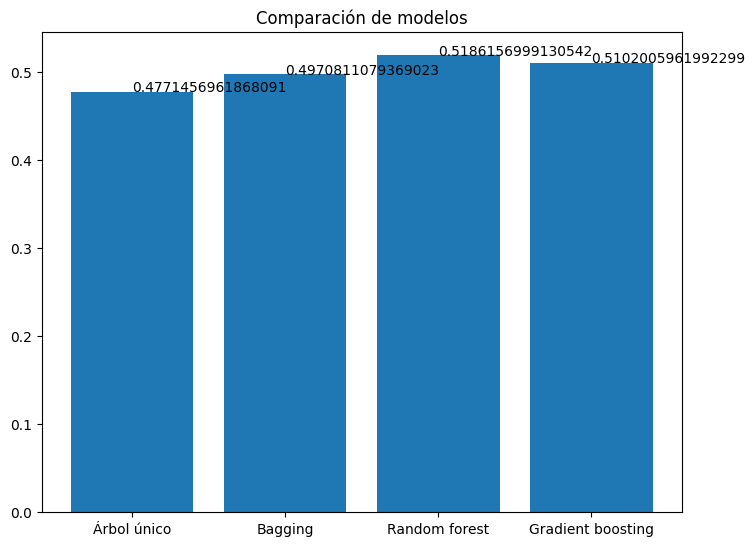

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos")
ejeX = ['Árbol único','Bagging' ,'Random forest','Gradient boosting']
ejeY = [AUCTree, AUCBag, AUCRF, AUCGB]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

(Utilicen este espacio para escribir su análisis y conclusiones sobre el punto 6)

Se exploró el uso de árboles de decisión y técnicas de ensamblaje, incluyendo bagging, random forest y gradient boosting, con el objetivo de mejorar el desempeño del modelo. Si bien el mejor desempeño se obtuvo con random forest, la mejora fue mínima en comparación con los demás enfoques, con valores de AUC en un rango de 0.47 a 0.52. Esto sugiere que, a pesar de la aplicación de métodos más avanzados, la calidad de los datos o la naturaleza del problema impiden que el modelo alcance un desempeño satisfactorio. Es posible que sea necesario explorar características adicionales, técnicas de preprocesamiento más avanzadas o incluso modelos distintos para lograr una mejor capacidad predictiva.
